In [86]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "insurance"


**Joshua Data Analysis**


**Content**


*Columns*

age: age of primary beneficiary

sex: insurance contractor gender: female, male

bmi: Body mass index, 

providing an understanding of body,

weights that are relatively high or low relative to height,

objective index of body weight (kg / m ^ 2) using the ratio of height to weight,

ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [87]:
library(tidyverse)
library(readr)
library(ggplot2)

In [88]:
#import dataset

df <- read.csv("/kaggle/input/insurance/insurance.csv")


In [89]:
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [90]:
n_distinct(df$age)
n_distinct(df$children)

[1] 47

[1] 6

In [91]:
#bmi summary
summary(df$bmi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.96   26.30   30.40   30.66   34.69   53.13 

In [92]:
df_f <- df %>% filter(sex =="female")%>% group_by(age, children, smoker, region)%>% summarise(max_bmi = max(bmi))
df_m <- df %>% filter(sex =="male")%>% group_by(age, children, smoker, region)%>% summarise(max_bmi = max(bmi))

`summarise()` has grouped output by 'age', 'children', 'smoker'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'age', 'children', 'smoker'. You can
override using the `.groups` argument.


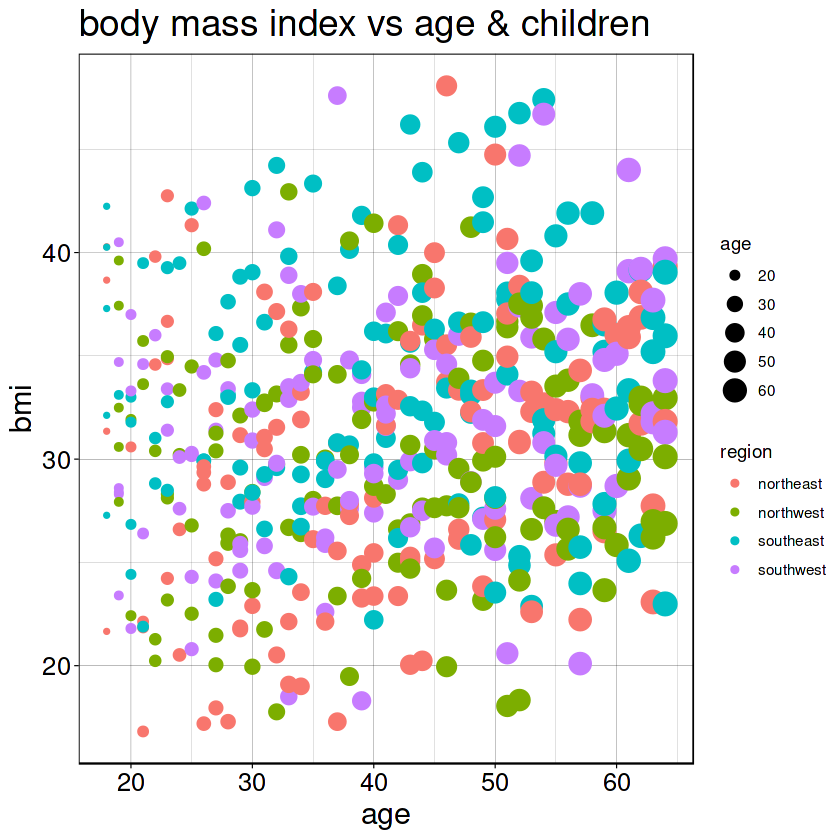

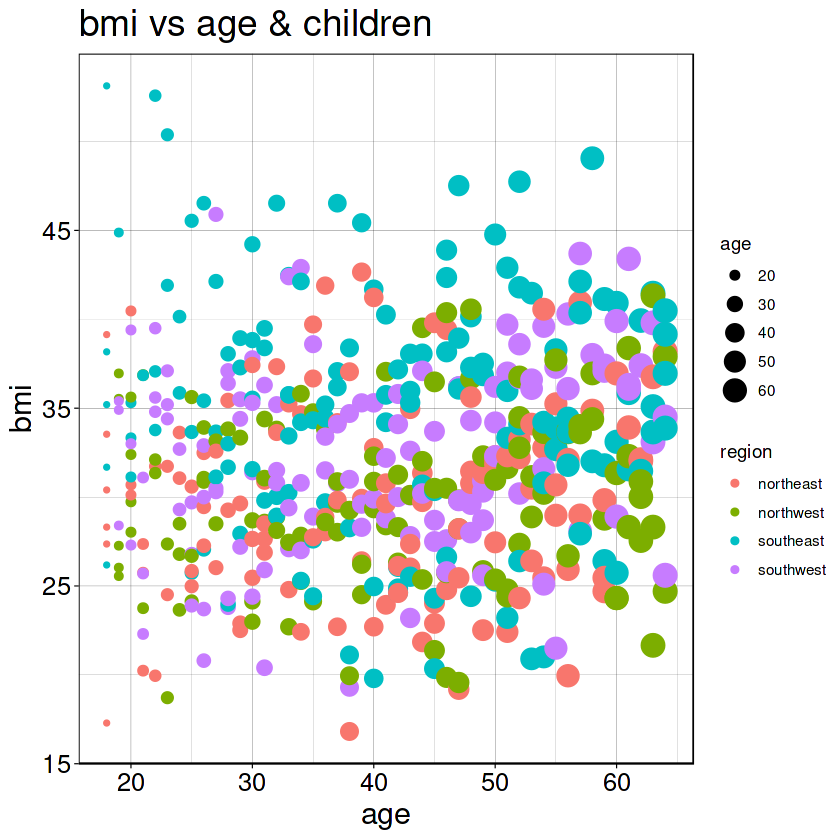

In [110]:
ggplot(df_f, aes(x=age, y= max_bmi)) + 
  geom_point(aes(color=region,size=age)) + 
  labs(x="age", 
       y="bmi",
       title="body mass index vs age & children")+ 
        theme_linedraw()+
       theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))


ggplot(df_m, aes(x=age, y= max_bmi)) + 
  geom_point(aes(color=region  ,size=age)) + 
  labs(x="age", 
       y="bmi",
       title="bmi vs age & children")+ 
        theme_linedraw()+
       theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))






In [94]:
summary(df_m)

      age           children        smoker             region         
 Min.   :18.00   Min.   :0.000   Length:497         Length:497        
 1st Qu.:29.00   1st Qu.:0.000   Class :character   Class :character  
 Median :40.00   Median :1.000   Mode  :character   Mode  :character  
 Mean   :40.39   Mean   :1.316                                        
 3rd Qu.:51.00   3rd Qu.:2.000                                        
 Max.   :64.00   Max.   :5.000                                        
    max_bmi     
 Min.   :16.82  
 1st Qu.:27.55  
 Median :31.64  
 Mean   :31.95  
 3rd Qu.:35.97  
 Max.   :53.13  

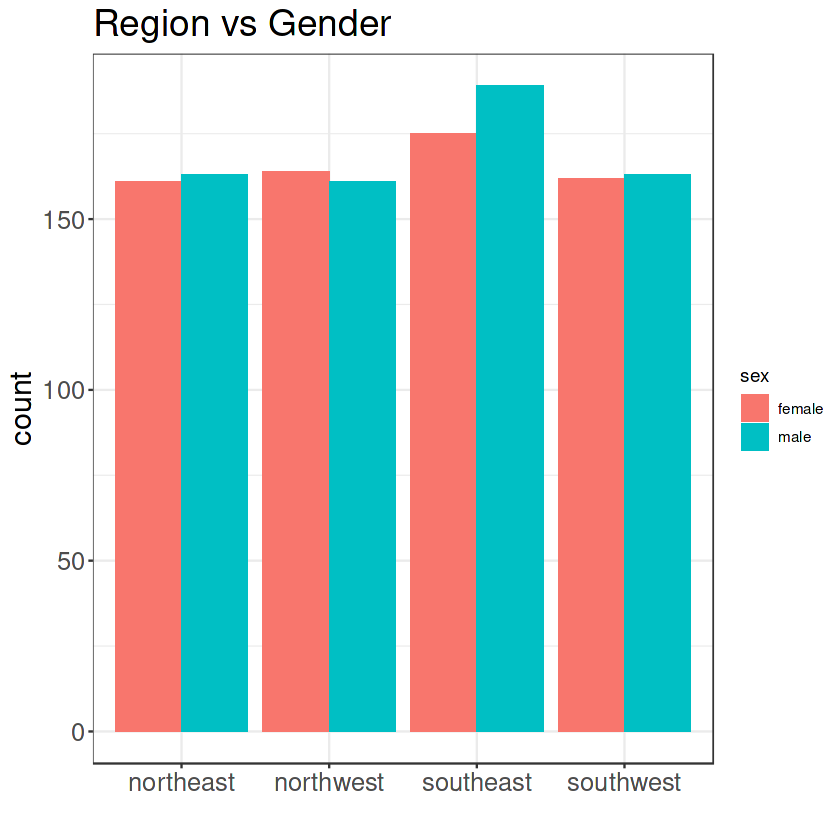

In [95]:
ggplot(data = df, aes(x = region, fill = sex )) + geom_bar(position = "dodge")+  labs(x=" ",
         y="count", 
       title="Region vs Gender  ")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

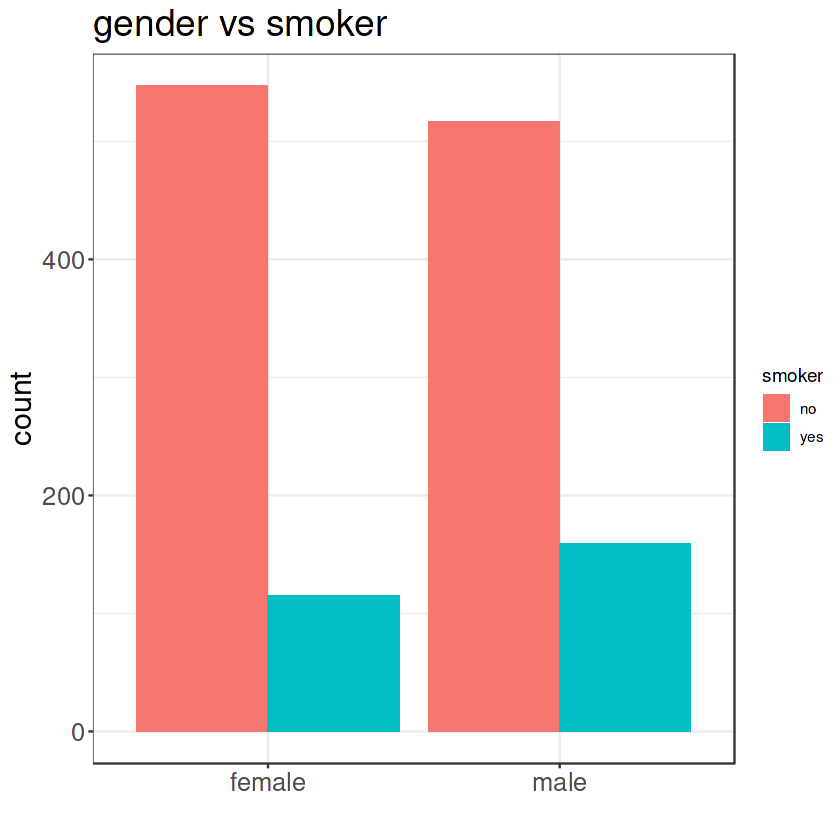

In [96]:
ggplot(data = df, aes(x = sex, fill = smoker )) + geom_bar(position = "dodge")+  labs(x=" ",
         y="count", 
       title="gender vs smoker  ")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

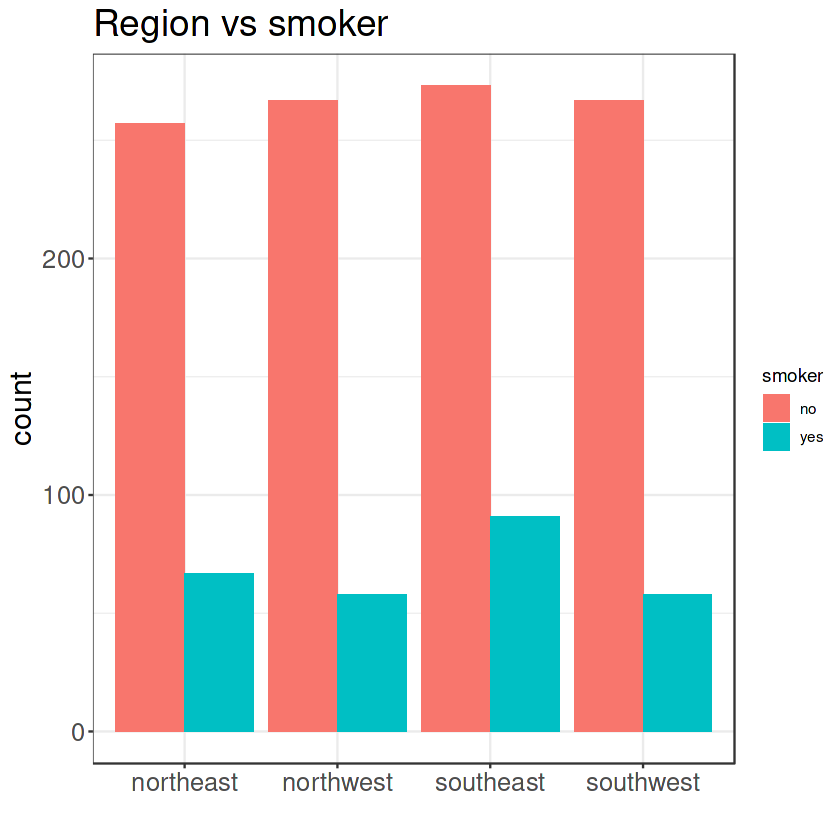

In [97]:
ggplot(data = df, aes(x = region, fill = smoker )) + geom_bar(position = "dodge")+  labs(x=" ",
         y="count", 
       title="Region vs smoker  ")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

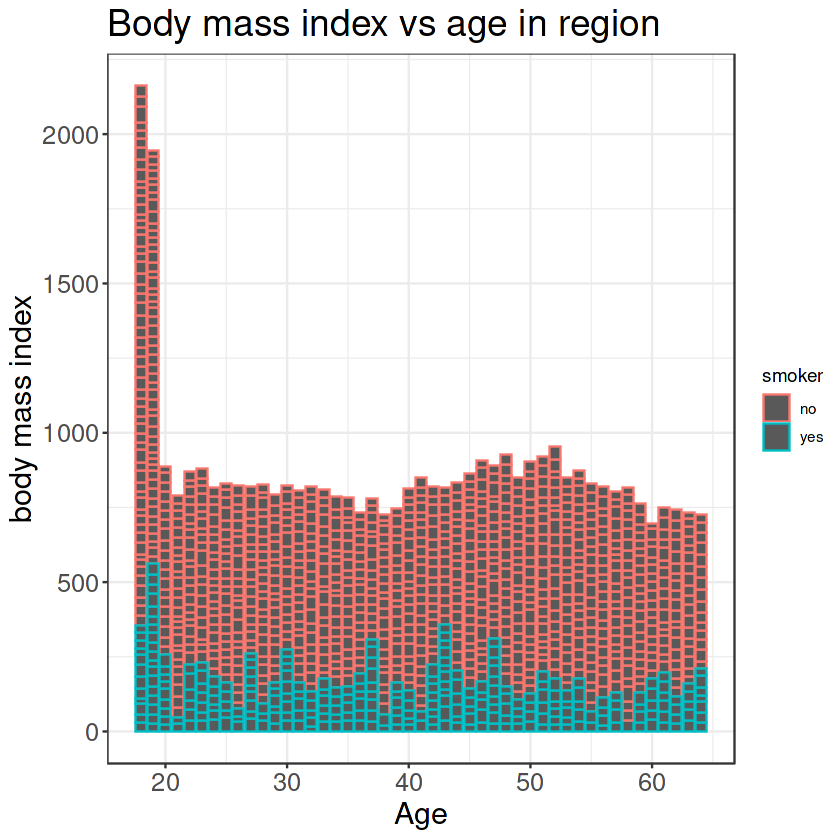

In [98]:
ggplot(df, aes(x= age, y=bmi,color= smoker)) +
   geom_col()+ scale_y_continuous()+  # Adjusting size and width of points
    labs(x="Age",
         y="body mass index", 
       title="Body mass index vs age in region  ")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

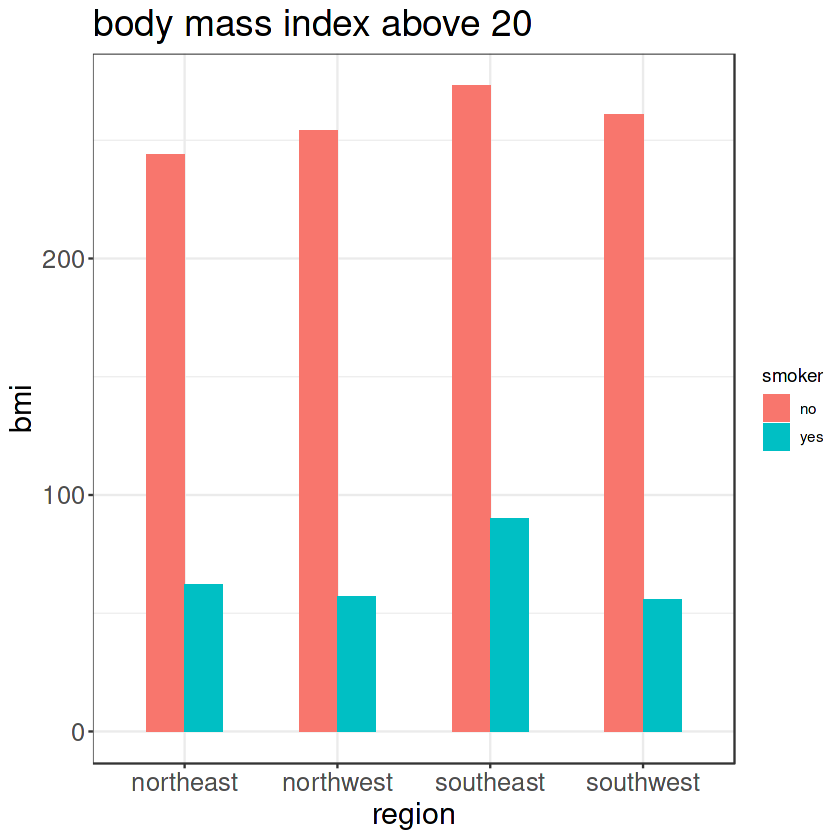

In [99]:
ggplot(df [df$bmi>20,], aes(region, fill = smoker))+
geom_bar(position = "dodge", stat="count", width = 0.5)+
 labs(x="region",
         y="bmi", 
       title="body mass index above 20 ")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

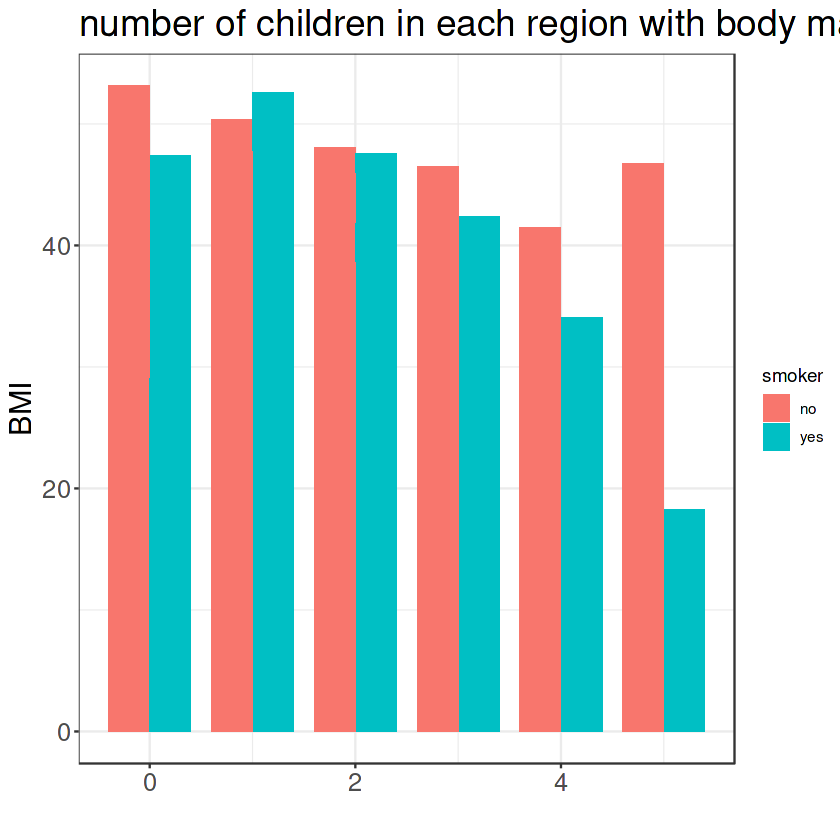

In [100]:
ggplot(df, aes(x=children, y=bmi,fill=smoker)) + 
  geom_col(position = "dodge", width = 0.8)+
labs(x="",
         y="BMI", 
       title="number of children in each region with body mass index")+  
theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))

Let's compare the charge between the smoker vs nonesmoker and between the male and famele vs Body mass index

In [101]:
summary(df$charge)

df %>% group_by(sex) %>% summarise(avg_price = mean(charges))

df %>% group_by(sex,smoker, age) %>% summarise(max_price = max(charges))%>% arrange(desc(max_price))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

sex,avg_price
<chr>,<dbl>
female,12569.58
male,13956.75


`summarise()` has grouped output by 'sex', 'smoker'. You can override using the
`.groups` argument.


sex,smoker,age,max_price
<chr>,<chr>,<int>,<dbl>
female,yes,54,63770.43
male,yes,45,62592.87
male,yes,52,60021.40
female,yes,31,58571.07
female,yes,33,55135.40
male,yes,60,52590.83
male,yes,28,51194.56
male,yes,64,49577.66
male,yes,59,48970.25


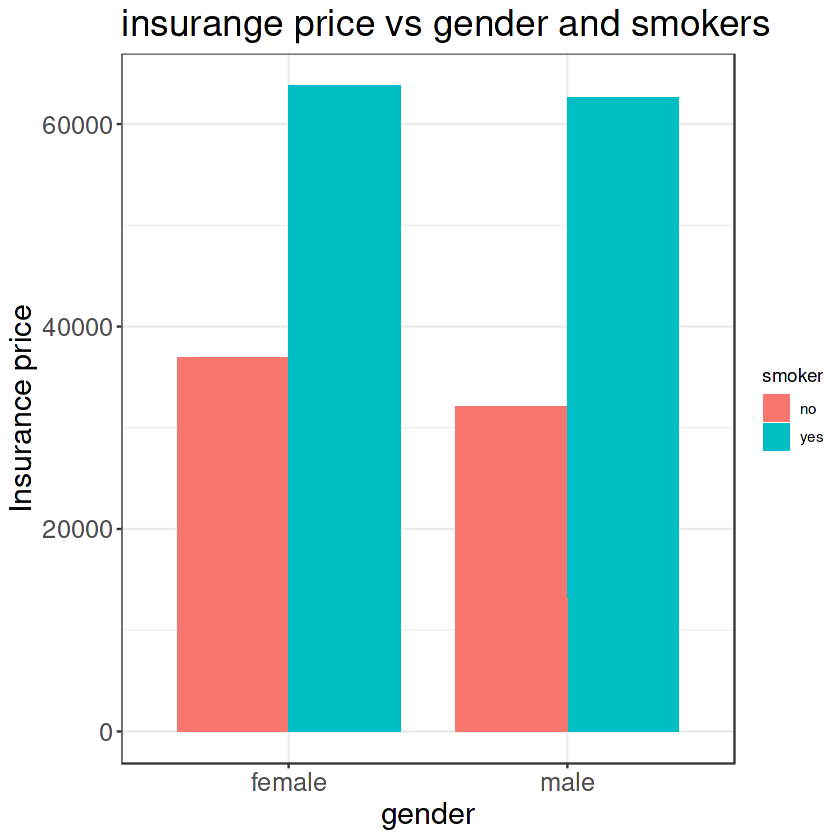

In [102]:
ggplot(df, aes(x=sex, y=charges,fill=smoker)) + 
  geom_col(position = "dodge", width = 0.8)+
labs(x="gender",
         y="Insurance price", 
       title="insurange price vs gender and smokers")+  
theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))

Warning message in geom_smooth(methode = "loess", formula = y ~ x):
“Ignoring unknown parameters: `methode`”
`geom_smooth()` using method = 'loess'


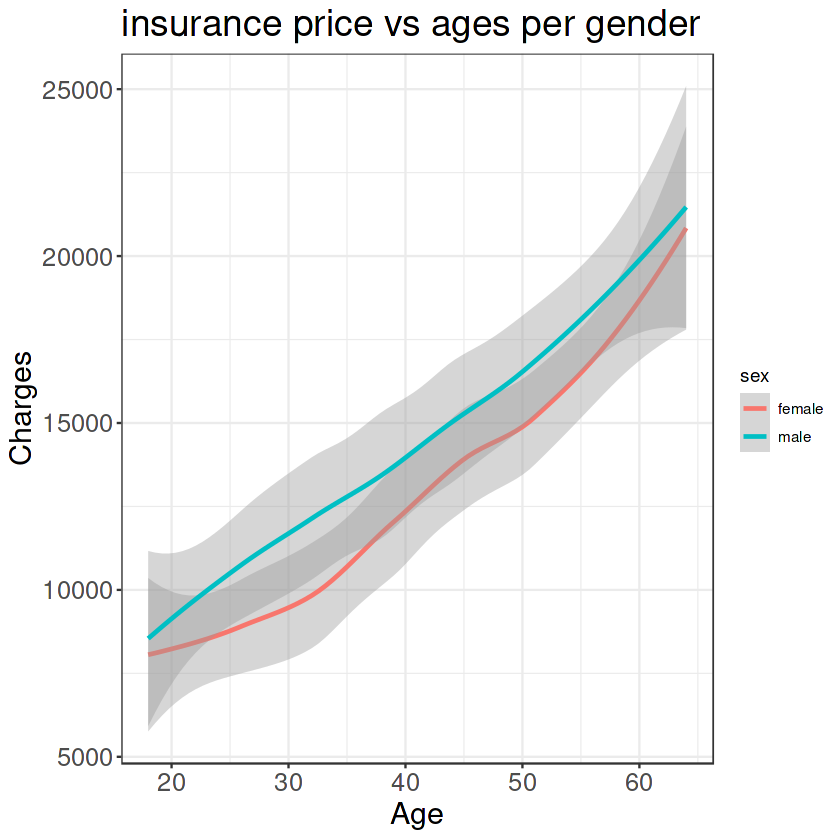

In [103]:
ggplot(df, aes(x= age, y=charges,color= sex)) +
   geom_smooth(methode = "loess", formula = y~x)+  # Adjusting size and width of points
    labs(x="Age",
         y="Charges", 
       title="insurance price vs ages per gender ")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

Warning message in geom_smooth(methode = "loess"):
“Ignoring unknown parameters: `methode`”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


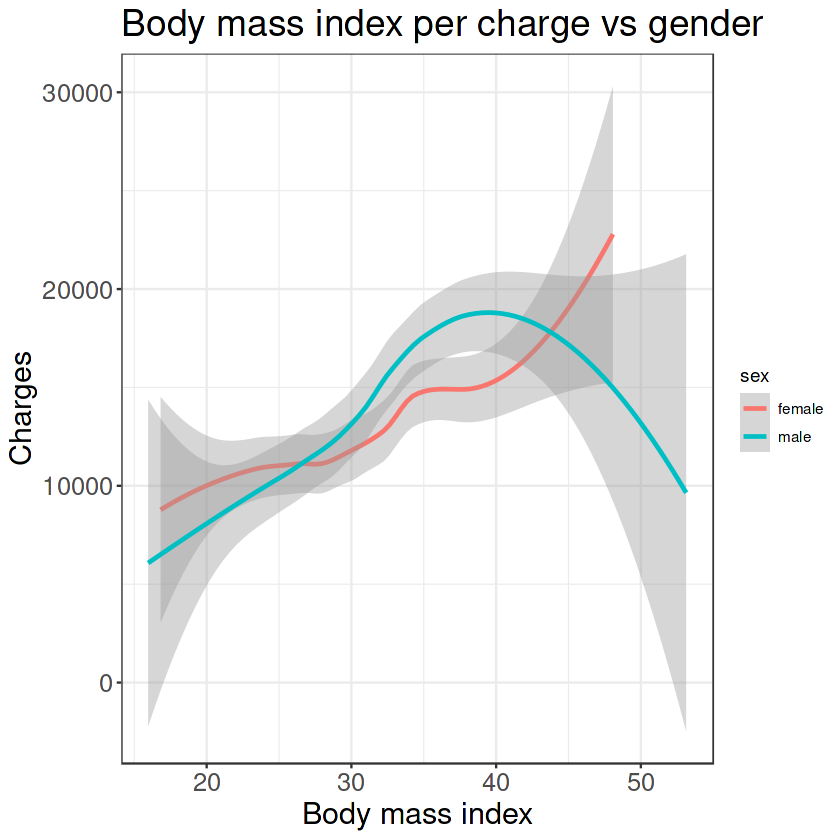

In [104]:
ggplot(df, aes(x= bmi, y=charges,color= sex)) +
   geom_smooth(methode = "loess")+  # Adjusting size and width of points
    labs(x="Body mass index",
         y="Charges", 
       title="Body mass index per charge vs gender")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

**Conclusion**

As we can see according to the dataset provided it showed smoker are more charge than the  nonesmoker. and the body mass index showed the males from40 year theinsurange price start droping unlike females insurange price going up.